In [2]:
import os
print(os.getcwd())

/Users/tylerbrecker


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [4]:
import psutil
import os

In [5]:
df = pd.read_csv("/Users/tylerbrecker/Downloads/Airbnb_Open_Data.csv", low_memory=False)

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:

(round(df.isnull().sum() / df.shape[0] * 100, 2)).sort_values(ascending=False)

license                           100.00
house_rules                        50.81
last review                        15.49
reviews per month                  15.48
country                             0.52
availability 365                    0.44
host name                           0.40
minimum nights                      0.40
review rate number                  0.32
calculated host listings count      0.31
host_identity_verified              0.28
service fee                         0.27
NAME                                0.24
price                               0.24
Construction year                   0.21
number of reviews                   0.18
country code                        0.13
instant_bookable                    0.10
cancellation_policy                 0.07
neighbourhood group                 0.03
neighbourhood                       0.02
long                                0.01
lat                                 0.01
id                                  0.00
host id         

In [9]:
df.dropna(subset=['availability 365'], inplace=True)

In [10]:
datetime_dim = df[df["availability 365"] <= 365][["minimum nights", "availability 365"]].reset_index(drop=True)

In [11]:
datetime_dim["avg availability 90"] = df["availability 365"] * (90/365) 
datetime_dim["avg availability 60"] = df["availability 365"] * (60/365)

In [12]:
datetime_dim["datetime_id"] = datetime_dim.index

In [13]:
price_dim = df[["price","service fee"]].reset_index(drop=True)
price_dim["price_id"] = price_dim.index
price_dim = price_dim[["price","service fee","price_id"]]

df.dropna(subset=['reviews per month'], inplace=True)

reviews_dim = df[["reviews per month","number of reviews","review rate number"]].reset_index(drop=True)
reviews_dim["reviews_per_id"] = reviews_dim.index
reviews_dim = reviews_dim[[ "reviews per month","number of reviews","review rate number","reviews_per_id"]]

Listing_dim = df[["NAME","neighbourhood","neighbourhood group","room type","lat","long","country","instant_bookable","cancellation_policy","house_rules"]].reset_index(drop=True)
Listing_dim["listing_id"] = Listing_dim.index
Listing_dim = Listing_dim[["NAME","neighbourhood", "neighbourhood group","room type", "lat","long","country","instant_bookable","cancellation_policy","house_rules","listing_id"]]

Host_dim = df[["host name","host_identity_verified"]].reset_index(drop=True)
Host_dim["host_ids"] = Host_dim.index
Host_dim = Host_dim[["host name","host_identity_verified","host_ids"]]


In [14]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')


In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [16]:
df['price'] = df['price'].fillna(df['price'].mean())


In [17]:
columns_to_include = ['price', 'number of reviews','reviews per month','lat','long','minimum nights','availability 365']

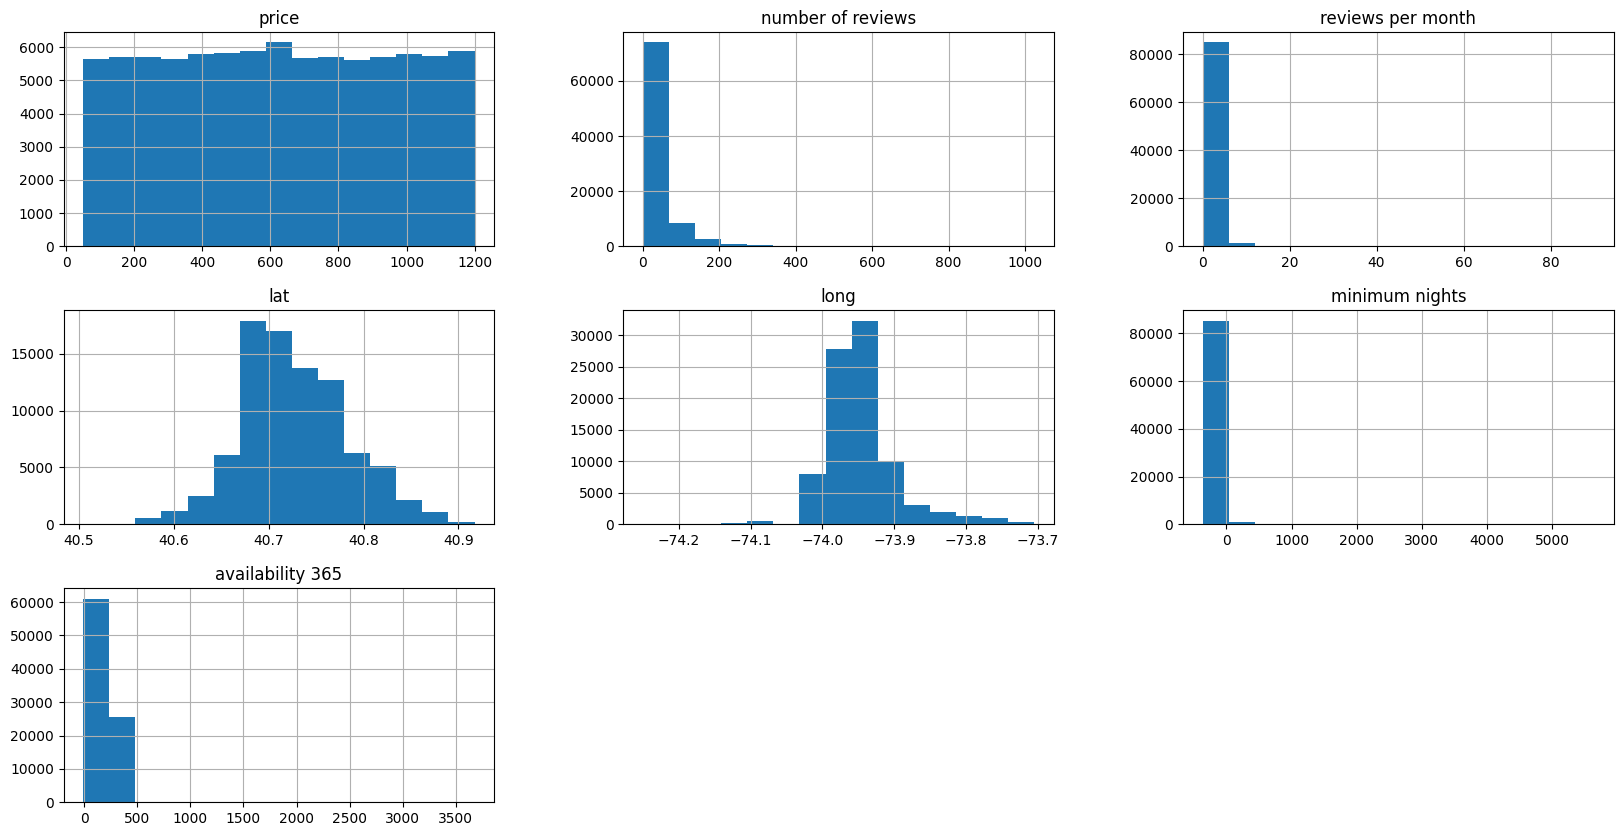

In [18]:
df[columns_to_include].hist(bins=15, figsize=(20,10));

In [19]:
df[['price', 'minimum nights', 'number of reviews', 'reviews per month',
    'availability 365']].describe()

,price,minimum nights,number of reviews,reviews per month,availability 365
count,86533.000000,86201.000000,86473.000000,86533.000000,86533.000000
mean,626.116263,7.462141,32.343182,1.373759,142.088602
std,331.245300,27.913065,52.019480,1.745304,133.956459
min,50.000000,-365.000000,1.000000,0.010000,-10.000000
25%,341.000000,2.000000,3.000000,0.220000,6.000000
50%,626.116263,3.000000,11.000000,0.740000,101.000000
75%,913.000000,5.000000,38.000000,2.000000,267.000000
max,1200.000000,5645.000000,1024.000000,90.000000,3677.000000


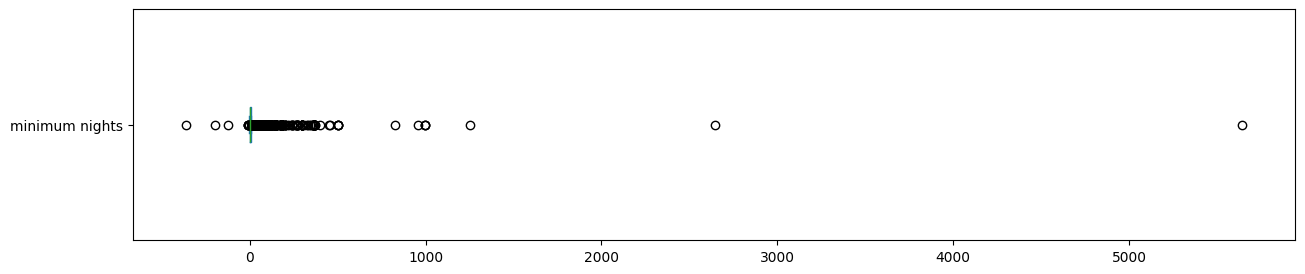

Values over 30 nights: 
1200
1.3868%


In [20]:
df['minimum nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print('Values over 30 nights: ')
print(len(df[df['minimum nights'] > 30]))
print('{:.4f}%'.format((len(df[df['minimum nights'] > 30]) / df.shape[0]) * 100))

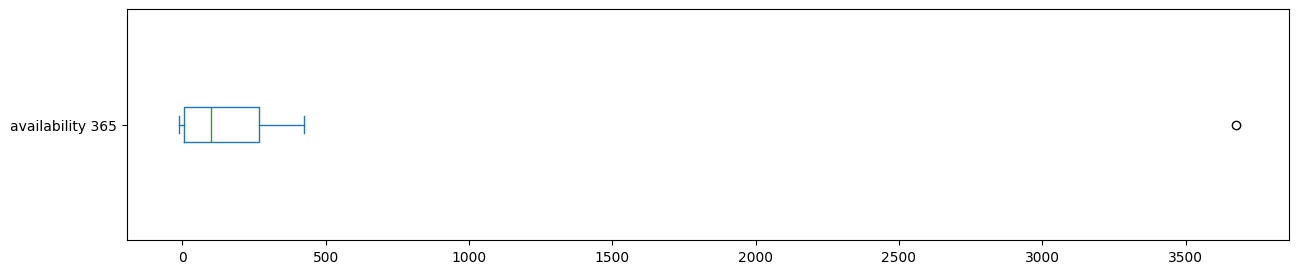

Values over 365: 
2273
2.6267%


In [21]:
df['availability 365'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print('Values over 365: ')
print(len(df[df['availability 365'] > 365]))
print('{:.4f}%'.format((len(df[df['availability 365'] > 365]) / df.shape[0]) * 100))

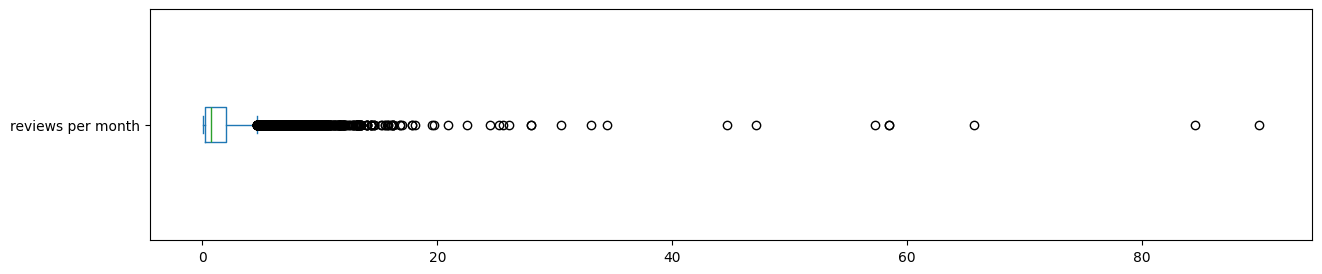

Values over 5: 
3089
3.5697%




In [22]:
df['reviews per month'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print('Values over 5: ')
print(len(df[df['reviews per month'] > 5]))
print('{:.4f}%'.format((len(df[df['reviews per month'] > 5]) / df.shape[0]) * 100))
print('\n')

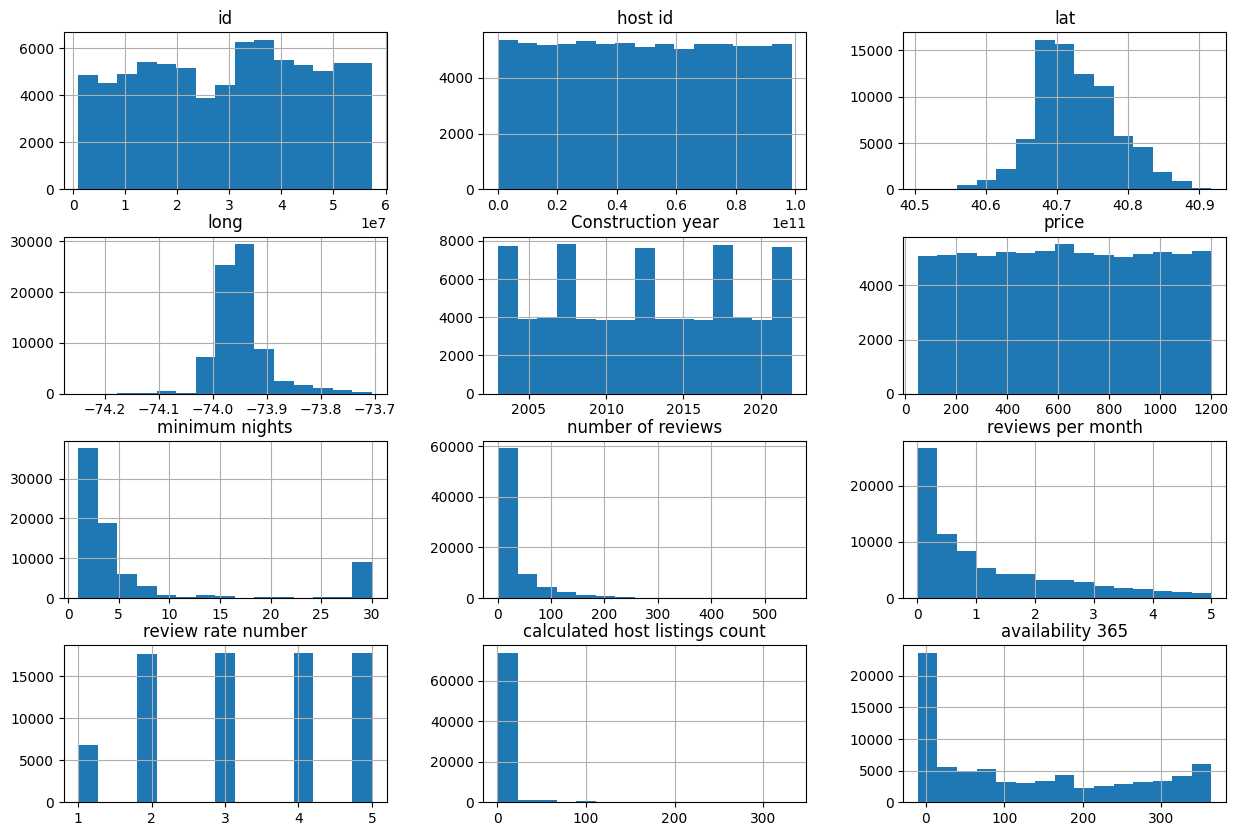

In [23]:
df_new = df[(df['reviews per month'] <= 5) & (df['reviews per month'] > 0) & (df['minimum nights'] <= 30)& (df['minimum nights'] > 0)  & (df['availability 365'] < 365)].copy()

df_new.hist(bins = 15, figsize=(15,10));


In [24]:
corr = df_new[['price', 'minimum nights', 'number of reviews', 'reviews per month', 'availability 365']].corr()

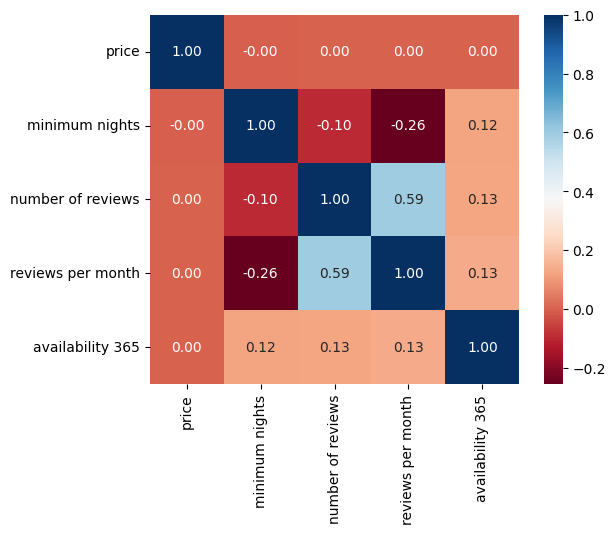

In [25]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

It Is clearly shown that there is no actionable correlations between the values

neighbourhood group
Bronx            631.57
Brooklyn         627.38
Queens           627.37
Manhattan        624.00
Staten Island    620.68
brookln          580.00
manhatan         460.00
Name: price, dtype: float64




/var/folders/qx/nlj4rwzx5x7_wrbfj8msmkx40000gn/T/ipykernel_44422/1995829594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(price_region.index , palette=sns.xkcd_palette(colors))
/var/folders/qx/nlj4rwzx5x7_wrbfj8msmkx40000gn/T/ipykernel_44422/1995829594.py:11: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(price_region.index , palette=sns.xkcd_palette(colors))


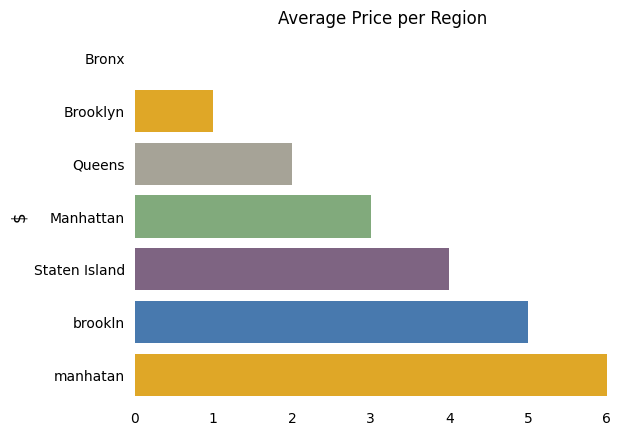

In [26]:
price_region = round(df_new.groupby('neighbourhood group').price.mean().sort_values(ascending=False), 2)

print(price_region)
print('\n')

# Plotting the average price per region
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

legend =False

ax = sns.barplot(price_region.index , palette=sns.xkcd_palette(colors)) 
ax.set_title('Average Price per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

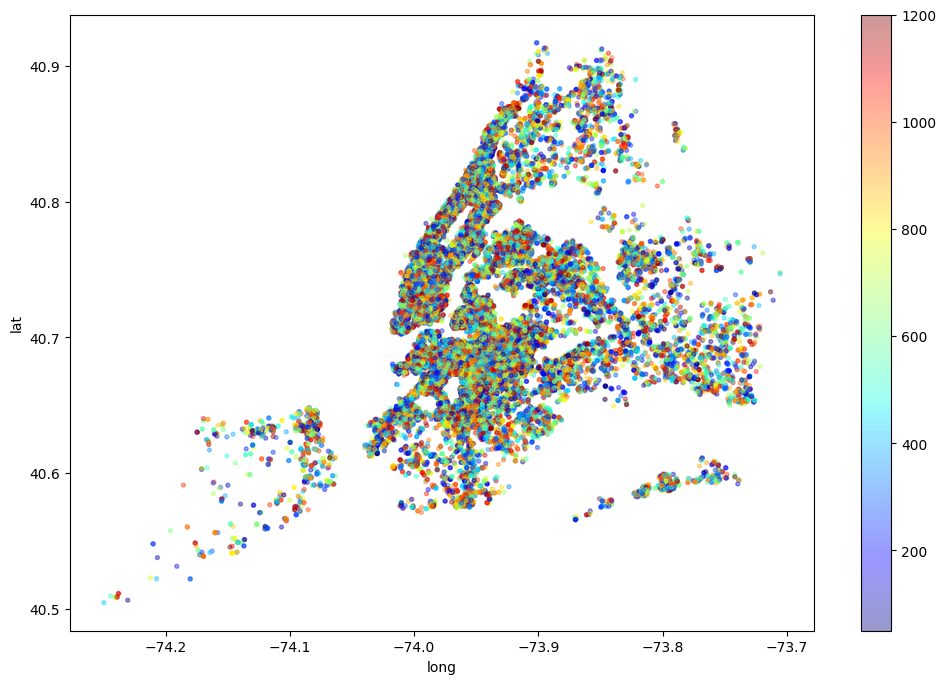

In [27]:
df_new.plot(kind='scatter', x='long', y='lat', alpha=0.4, c=df_new['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));
